# CellMap for pancreas endocrine cell data

The tutorial for pancreas endocrine cell data ([Bastidas et al., 2019](https://doi.org/10.1242/dev.173849)).

## Regular procedure

In [1]:
import cellmap
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

Preprocessing the raw data

In [3]:
scanpy.pp.log1p(adata)

Compute velocity and show the stream on UMAP. 

In [4]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata,mode='stochastic')
scv.tl.velocity_graph(adata)

Normalized count data: spliced, unspliced.
computing neighbors


2023-03-31 13:30:26.269729: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 13:30:26.271776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 13:30:26.317372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 13:30:26.318177: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 13:30:27.523138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:06) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:31) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


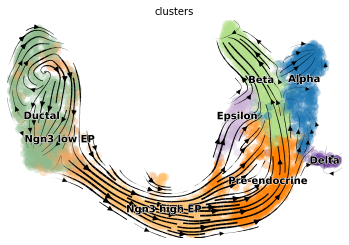

In [5]:
scv.pl.velocity_embedding_stream(adata)

CPU times: user 1min 4s, sys: 20.9 s, total: 1min 25s
Wall time: 44.7 s


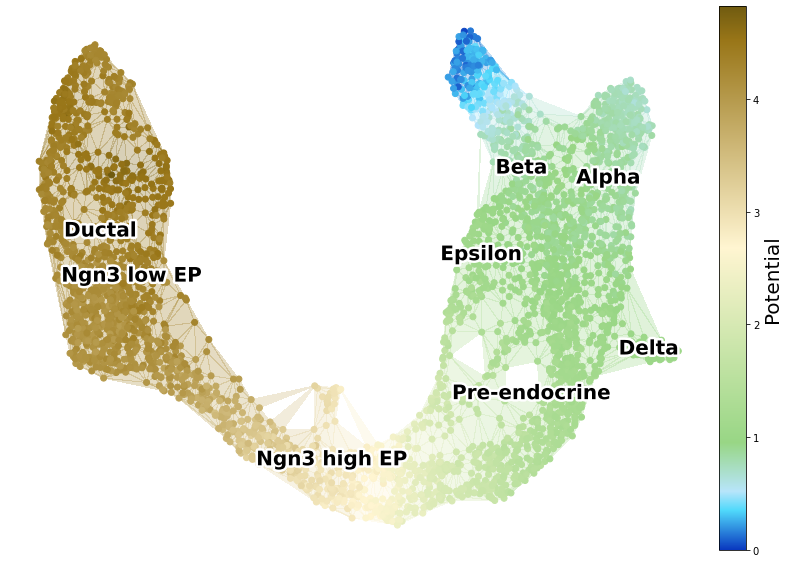

In [6]:
%%time
import cellmap

cellmap.Hodge_decomposition(adata)
cellmap.view(adata,show_graph = True,cluster_key = 'clusters')

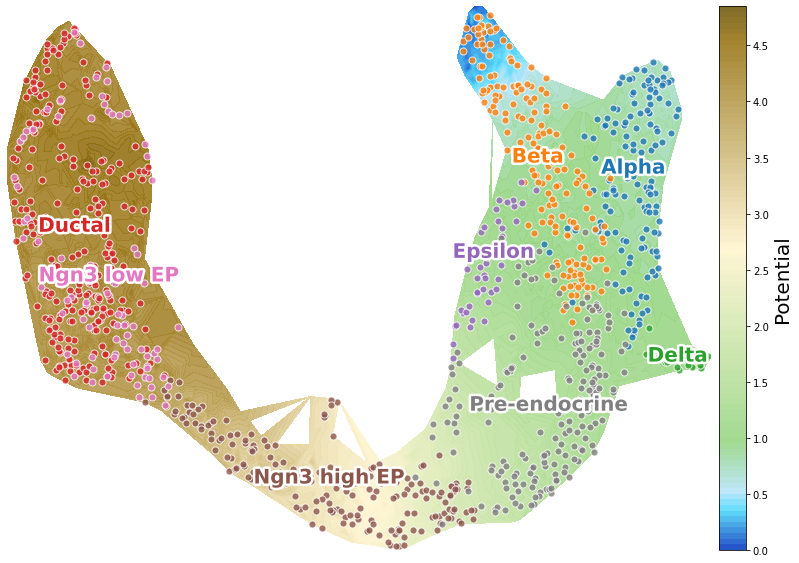

In [7]:
cellmap.view_cluster(adata,show_graph = True,cluster_key = 'clusters',s=50)

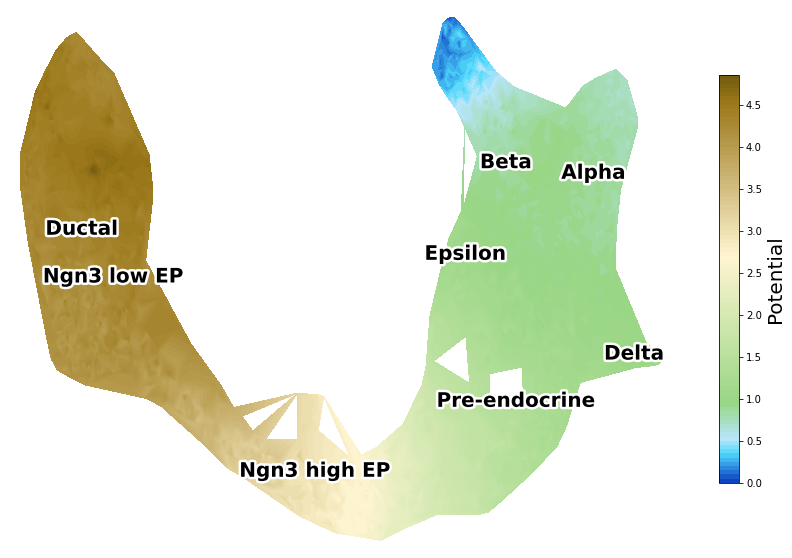

In [8]:
cellmap.view_surface(adata,cluster_key ='clusters')

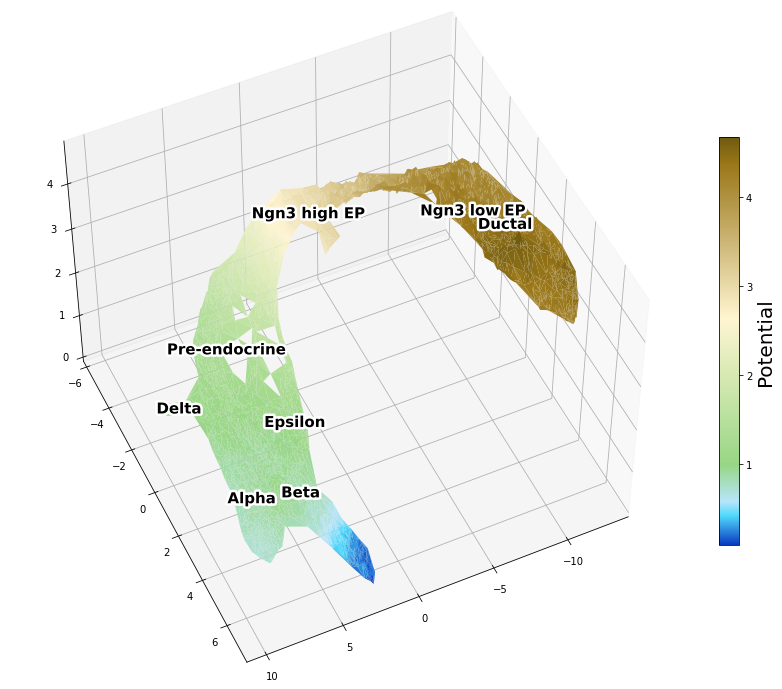

In [9]:
cellmap.view_surface_3D(adata,cluster_key ='clusters',elev=50,azim=65)

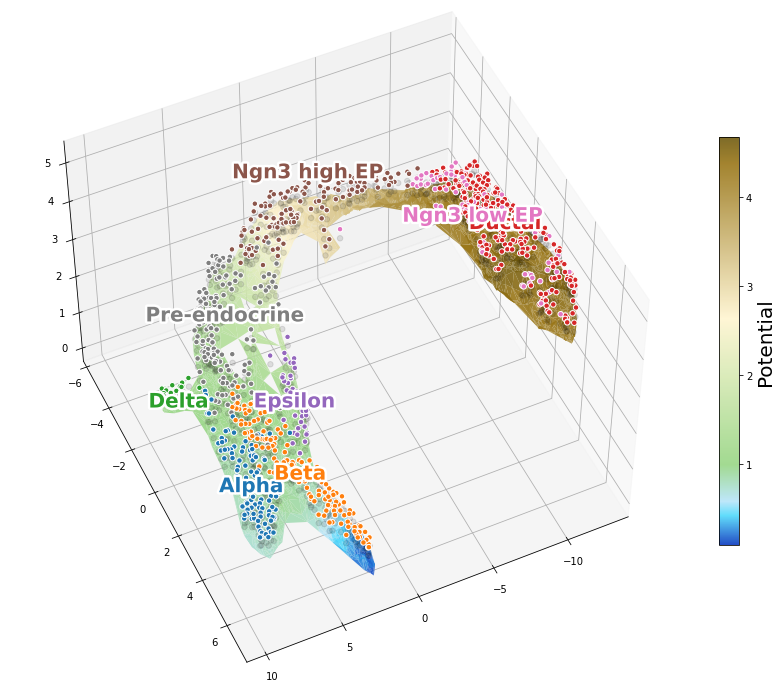

In [10]:
cellmap.view_surface_3D_cluster(adata,cluster_key ='clusters',elev=50,azim=65,s=30);

### Write expression and potential data as CSV file for **[CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer)**. 

In [11]:
cellmap.write(adata,filename='CellMap_tutorial_pancreas')

succeeded in writing CellMapp data as "CellMap_tutorial_pancreas.csv"
you can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


,X,Y,Potential,Annotation,HVG_Ccl9,HVG_Ccl3,HVG_Ccl2,HVG_Ccl4,HVG_Cartpt,HVG_Prph,HVG_Cym,HVG_Stmn2,HVG_Cxcl1,HVG_Ifitm1
CellID,,,,,,,,,,,,,,
AAACCTGAGAGGGATA,6.143066,-0.063644,1.060209,Pre-endocrine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
AAACCTGAGCCTTGAT,-9.906417,0.197778,4.084261,Ductal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
AAACCTGAGGCAATTA,7.559791,0.583762,0.960345,Alpha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
AAACCTGCATCATCCC,-11.283765,4.218998,4.435915,Ductal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
AAACCTGGTAAGTGGC,1.721565,-4.753407,1.943208,Ngn3 high EP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGACATA,4.768472,-1.388353,1.237544,Pre-endocrine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
TTTGTCAAGTGTGGCA,-1.873335,-4.182650,2.907192,Ngn3 high EP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94591
TTTGTCAGTTGTTTGG,-9.882250,-0.105594,4.158729,Ductal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


## Changing parameter $\alpha$

The parameter $\alpha$ adjust the rate of original/reduced dimensional information of gene expression and velocity. 

$\alpha=0$ uses only two-dimensional inormation; in contrast, $\alpha=1$ uses the original (non-dimensionaly reduction) information. 

In [12]:
alpha_set = [0,0.5,1]
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata,potential_key='Hodge_potential_%0.1f' % alpha,alpha=alpha)
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'Hodge_potential', 'Hodge_potential_0.0', 'Hodge_potential_0.5', 'Hodge_potential_1.0'
    var: 'highly_variable_genes', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'CM_graph', 'hvg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

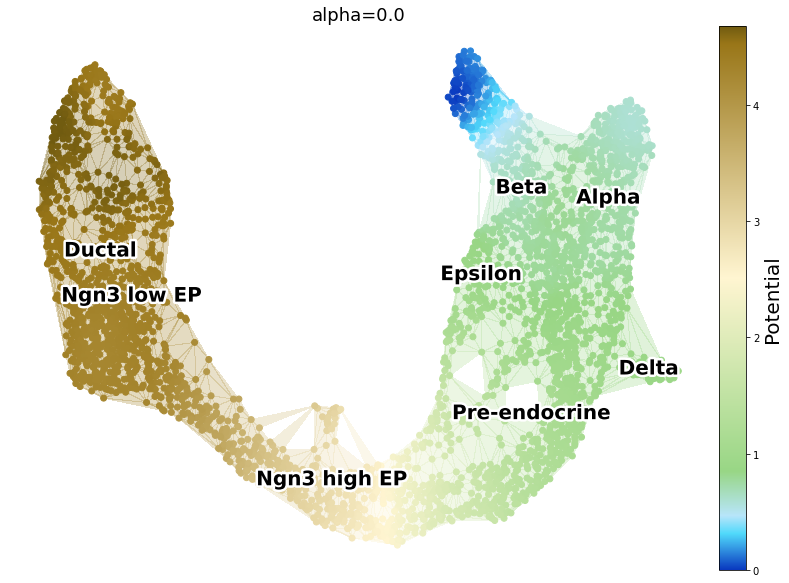

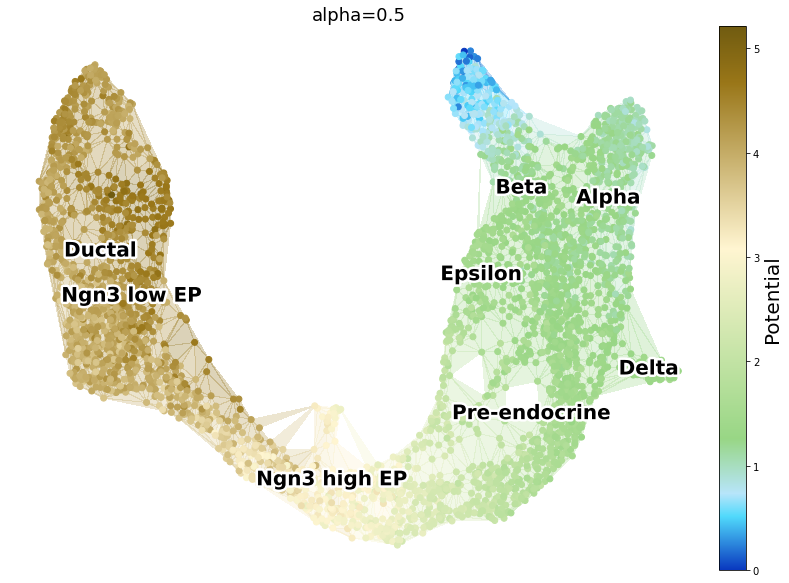

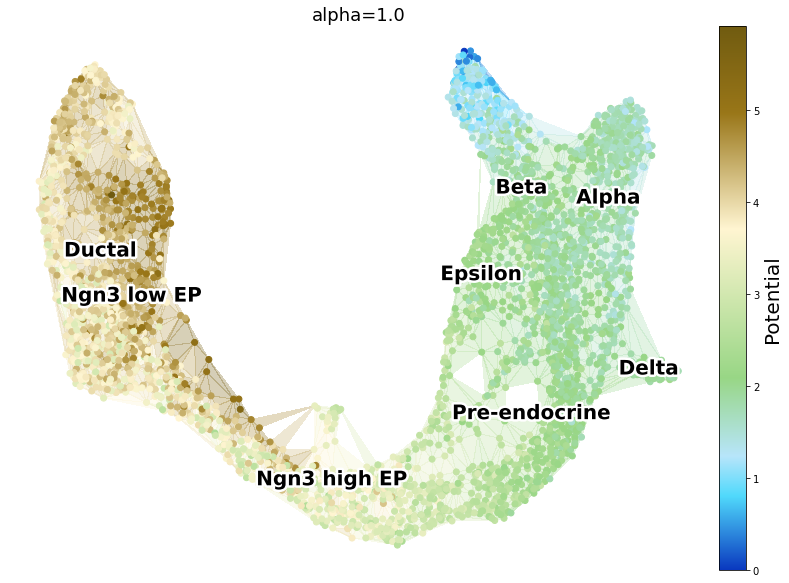

In [13]:
for alpha in alpha_set:
    cellmap.view(adata,show_graph = True,potential_key='Hodge_potential_%0.1f' % alpha,cluster_key='clusters',title='alpha=%0.1f' % alpha)

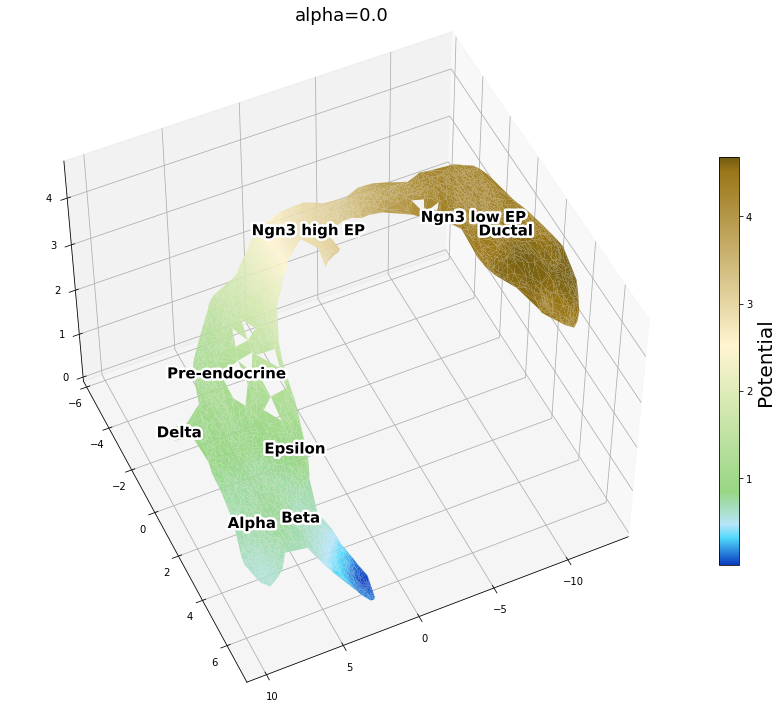

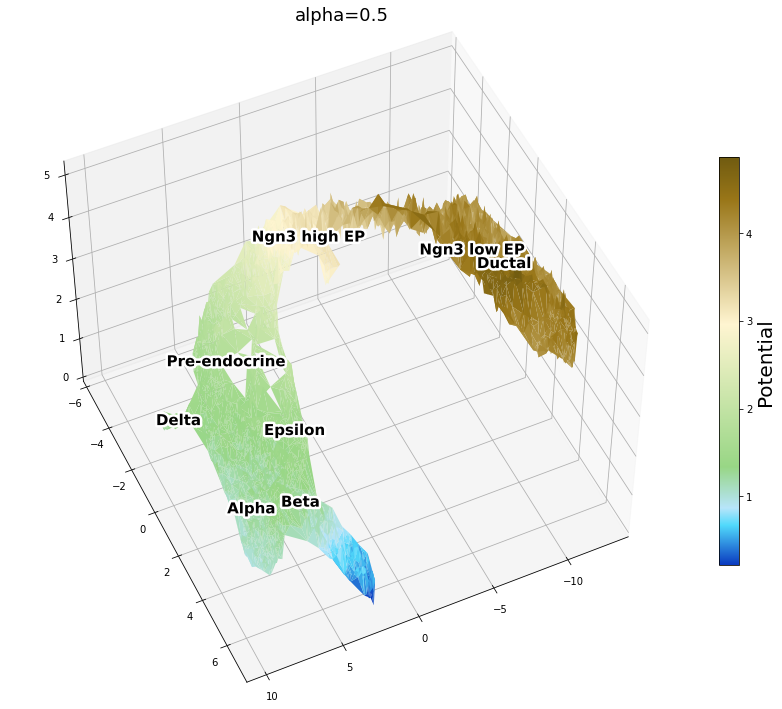

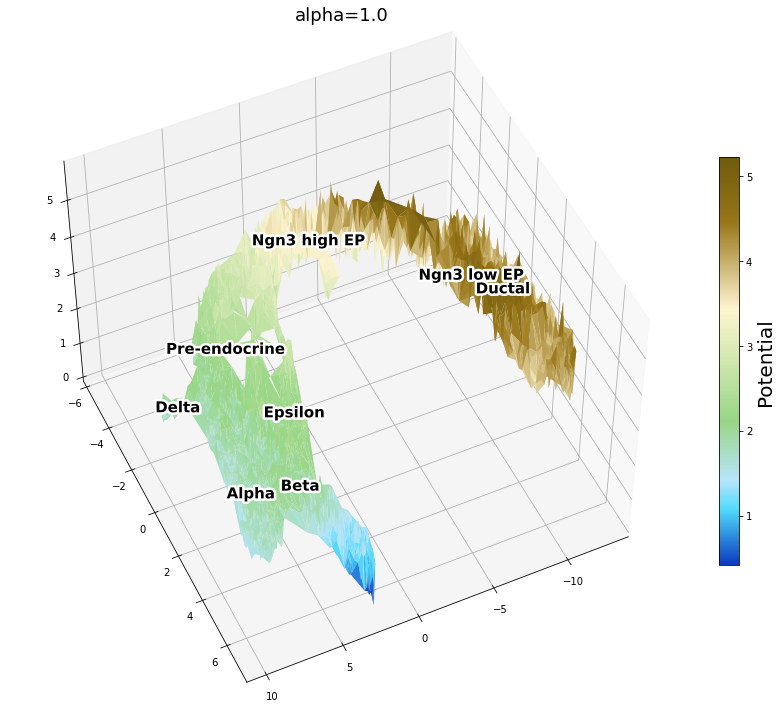

In [14]:
for alpha in alpha_set:
    cellmap.view_surface_3D(adata,cluster_key ='clusters',potential_key='Hodge_potential_%0.1f' % alpha,elev=50,azim=65,title='alpha=%0.1f' % alpha)